In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# a

In [2]:
n = 500
m0 = 1
m1 = 5

sigma0 = 1
sigma1 = np.sqrt(2)

pi0 = 0.3
pi1 = 0.7

In [3]:
sample = []

for i in range(n):
    if np.random.uniform(0, 1) < pi0:
        sample.append(np.random.normal(m0, sigma0, 1))
    else:
        sample.append(np.random.normal(m1, sigma1, 1))



In [4]:
sample = np.asarray(sample)
sample = sample.flatten()

In [5]:
x_axis = np.linspace(-2, 10, 100)
density = []

In [6]:
for x in x_axis:
    value = stats.norm.pdf(x, loc=m0, scale=sigma0) * pi0 + stats.norm.pdf(x, loc=m1, scale=sigma1) * pi1

    density.append(value)

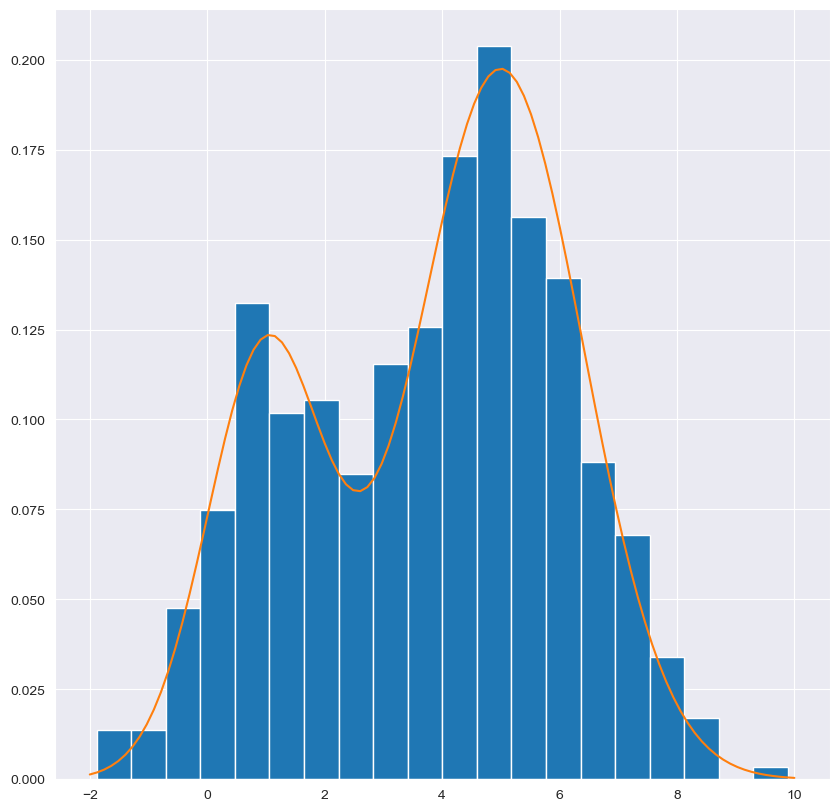

In [7]:
fig = plt.figure(figsize=(10, 10))
plt.hist(sample, bins=20, density=True)
plt.plot(x_axis, density)
plt.show()

# b

In [8]:
def loglikelihood(X, G, m0, m1, sigma0, sigma1, pi0, pi1):
    value = 0

    for i in range(len(X)):
        value += (1 - G[i]) * np.log(stats.norm.pdf(X[i], loc=m0, scale=sigma0) * pi0) + G[i] * np.log(
            stats.norm.pdf(X[i], loc=m1, scale=sigma1) * pi1)

    return value

# c

In [9]:
def Estep(x, m0, m1, sigma0, sigma1, pi0, pi1):
    gamma = pi1 * stats.norm.pdf(x, loc=m1, scale=sigma1) / (
                pi0 * stats.norm.pdf(x, loc=m0, scale=sigma0) + pi1 * stats.norm.pdf(x, loc=m1, scale=sigma1))

    return gamma

# d

In [10]:
def Mstep(X, m0, m1, sigma0, sigma1, pi0, pi1):
    m0_num = 0
    m0_den = 0

    m1_num = 0
    m1_den = 0

    sigma0_num = 0
    sigma1_num = 0
    gamma = 0
    for i in range(len(X)):
        gamma_i = Estep(X[i], m0, m1, sigma0, sigma1, pi0, pi1)

        m0_num += (1 - gamma_i) * X[i]
        m0_den += (1 - gamma_i)
        m1_num += (gamma_i) * X[i]
        m1_den += (gamma_i)

        sigma0_num += (1 - gamma_i) * (X[i] - m0) ** 2
        sigma1_num += (gamma_i) * (X[i] - m1) ** 2

        gamma += gamma_i

    m0 = m0_num / m0_den
    m1 = m1_num / m1_den
    sigma0 = (sigma0_num / m0_den) ** (1 / 2)
    sigma1 = (sigma1_num / m1_den) ** (1 / 2)

    pi1 = gamma / len(X)
    pi0 = 1 - pi1

    return m0, m1, sigma0, sigma1, pi0, pi1

# e

In [11]:
pi0 = 1 / 2
pi1 = 1 / 2

sigma0 = np.random.uniform(0, 10)
sigma1 = np.random.uniform(0, 10)
m0 = np.random.uniform(-10, 10)
m1 = np.random.uniform(-10, 10)

In [12]:
for i in range(1000):
    m0_new, m1_new, sigma0_new, sigma1_new, pi0_new, pi1_new = Mstep(sample, m0, m1, sigma0, sigma1, pi0,
                                                                     pi1)  #in my implementation Estep is done directly inside Mstep and is invoked from Mstep function
    if max(m0 - m0_new, m1 - m1_new, sigma0 - sigma0_new, sigma1 - sigma1_new, pi0 - pi0_new, pi1 - pi1_new) < 0.001:
        print(f'break from stopping criterion on i={i}')
        break

    m0, m1, sigma0, sigma1, pi0, pi1 = m0_new, m1_new, sigma0_new, sigma1_new, pi0_new, pi1_new

break from stopping criterion on i=165


# f)

In [13]:
density_estimated = []

In [14]:
for x in x_axis:
    value = stats.norm.pdf(x, loc=m0, scale=sigma0) * pi0 + stats.norm.pdf(x, loc=m1, scale=sigma1) * pi1

    density_estimated.append(value)

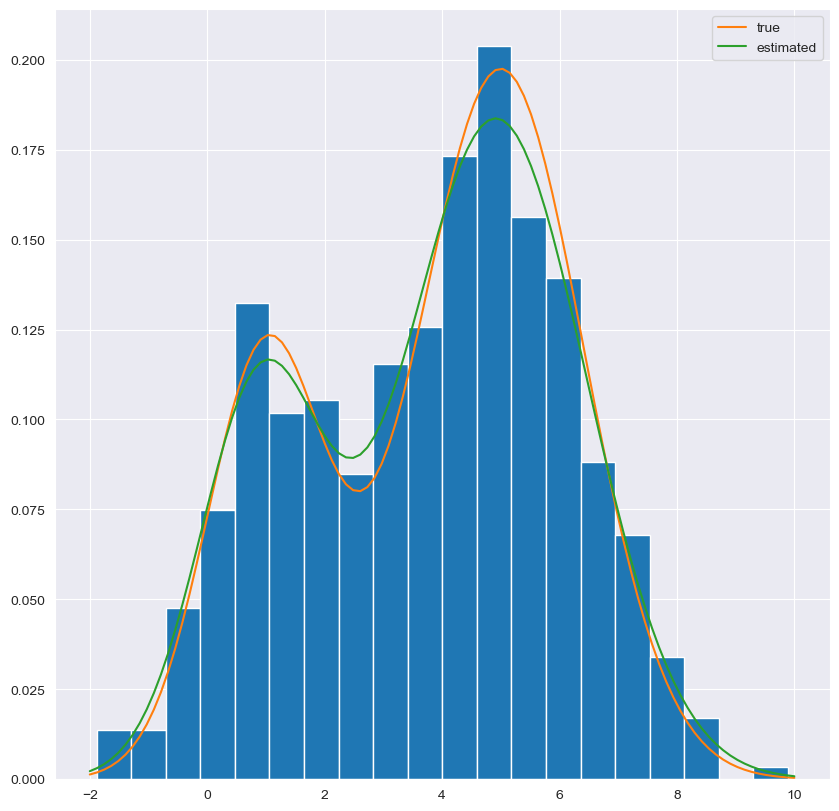

In [15]:
fig = plt.figure(figsize=(10, 10))
plt.hist(sample, bins=20, density=True)
plt.plot(x_axis, density, label='true')
plt.plot(x_axis, density_estimated, label='estimated')
plt.legend()
plt.show()